Train a custom CNN on a face mask dataset to classify whether a person is wearing a mask or not. This uses TensorFlow’s image_dataset_from_directory API for loading data.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, GlobalAveragePooling2D

In [6]:
dataset_dir='data'

#Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)

Found 7553 files belonging to 2 classes.
Found 7553 files belonging to 2 classes.
Found 7553 files belonging to 2 classes.


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [8]:
model=Sequential([
    Rescaling(1./255,input_shape=(128,128,3)),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3,activation='relu'),
    GlobalAveragePooling2D(),
    Dense(64,activation='relu'),
    Dense(1,activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/5
237/237 [==============================] - 132s 555ms/step - loss: 0.3947 - accuracy: 0.5068 - val_loss: 0.3449 - val_accuracy: 0.5068
Epoch 2/5
237/237 [==============================] - 140s 588ms/step - loss: 0.3316 - accuracy: 0.5068 - val_loss: 0.3542 - val_accuracy: 0.5068
Epoch 3/5
237/237 [==============================] - 143s 601ms/step - loss: 0.2962 - accuracy: 0.5068 - val_loss: 0.3050 - val_accuracy: 0.5068
Epoch 4/5
237/237 [==============================] - 149s 626ms/step - loss: 0.2809 - accuracy: 0.5068 - val_loss: 0.2606 - val_accuracy: 0.5068
Epoch 5/5
237/237 [==============================] - 158s 666ms/step - loss: 0.2638 - accuracy: 0.5068 - val_loss: 0.2508 - val_accuracy: 0.5068


In [12]:
loss, accuracy = model.evaluate(test_ds)
print(f"Loss: {loss:.2f}, Accuracy: {accuracy:.2f}")

237/237 [==============================] - 29s 120ms/step - loss: 0.2508 - accuracy: 0.5068
Loss: 0.25, Accuracy: 0.51


1/1 [==============================] - 0s 124ms/step


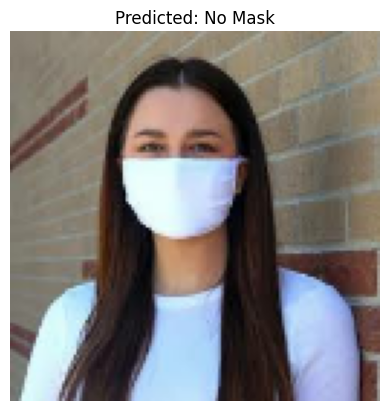

In [49]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Predicted: {'Mask' if preds[0] < 0 else 'No Mask'}")
    plt.axis('off')
    plt.show()
    break
